# HOMEWORK 13

In this homework you are going to build your first classifier for the CIFAR-10 dataset. This dataset contains 10 different classes and you can learn more about it [here](https://www.cs.toronto.edu/~kriz/cifar.html). This homework consists of the following tasks:
* Dataset inspection
* Building the network
* Training
* Evaluation

At the end, as usual, there will be a couple of questions for you to answer :-)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Step 0: Dataset Inspection

Load the dataset and make a quick inspection.

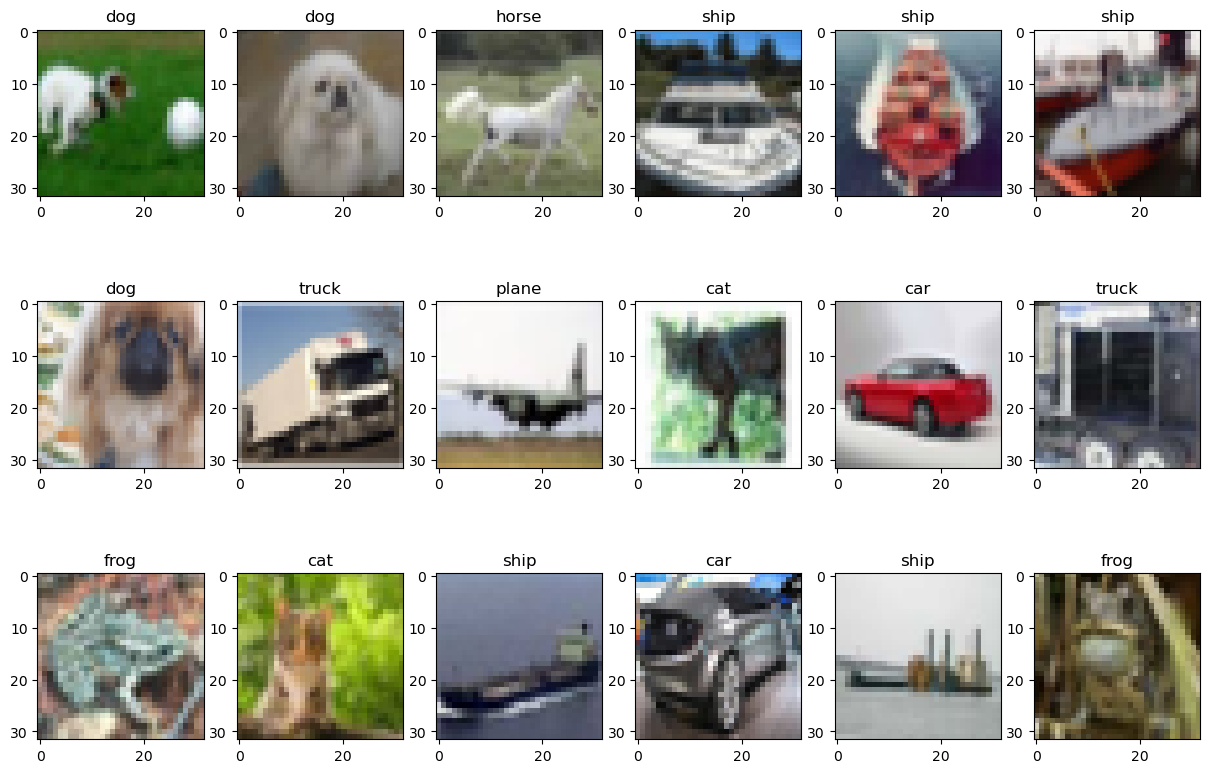

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, len(x_train))
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

Compute the class histogram (you can visualize it if you want). Is the dataset balanced?

Hint: You might find [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) tool useful. In any case, it's up to you how you compute the histogram.

In [3]:
# Compute the class histogram
from collections import Counter

train_indices = y_train.flatten()
hist = Counter(train_indices)

_values = np.array(list(hist.values()))
print("TRAIN min set:", np.min(_values), "max set", np.max(_values))

test_indices = y_test.flatten()
hist = Counter(test_indices)
_values = np.array(list(hist.values()))
print("TEST min set:", np.min(_values), "max set", np.max(_values))

TRAIN min set: 5000 max set 5000
TEST min set: 1000 max set 1000


каждый класс в "train" датасете представлен 5000 экземплярами, в "test" по 1000. можно считать его сбалансированным 

### Step 1: Data Preparation

In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vectors.

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
# Normalization
x_train = x_train/255
x_test = x_test/255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


### Step 2: Building the Classifier

Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [6]:
# Build the classifier
inputs = Input(shape=(size, size, 3))

net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)

# Show the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0     

### Step 3: Training

Compile the model and train it.

In [7]:
epochs = 25
batch_size = 128

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model

start = time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print('Elapsed time', time() - start)

Epoch 1/25
352/352 [==============================] - 1s 2ms/step - loss: 1.7293 - accuracy: 0.3861 - val_loss: 1.5251 - val_accuracy: 0.4654
Epoch 2/25
352/352 [==============================] - 1s 2ms/step - loss: 1.3966 - accuracy: 0.5108 - val_loss: 1.3201 - val_accuracy: 0.5316
Epoch 3/25
352/352 [==============================] - 1s 2ms/step - loss: 1.2881 - accuracy: 0.5508 - val_loss: 1.2464 - val_accuracy: 0.5706
Epoch 4/25
352/352 [==============================] - 1s 2ms/step - loss: 1.2179 - accuracy: 0.5764 - val_loss: 1.1854 - val_accuracy: 0.5872
Epoch 5/25
352/352 [==============================] - 1s 2ms/step - loss: 1.1720 - accuracy: 0.5950 - val_loss: 1.1618 - val_accuracy: 0.6014
Epoch 6/25
352/352 [==============================] - 1s 2ms/step - loss: 1.1260 - accuracy: 0.6077 - val_loss: 1.0994 - val_accuracy: 0.6232
Epoch 7/25
352/352 [==============================] - 1s 2ms/step - loss: 1.0919 - accuracy: 0.6224 - val_loss: 1.0950 - val_accuracy: 0.6204
Epoch 

Train Acc      0.7126222252845764
Validation Acc 0.6597999930381775


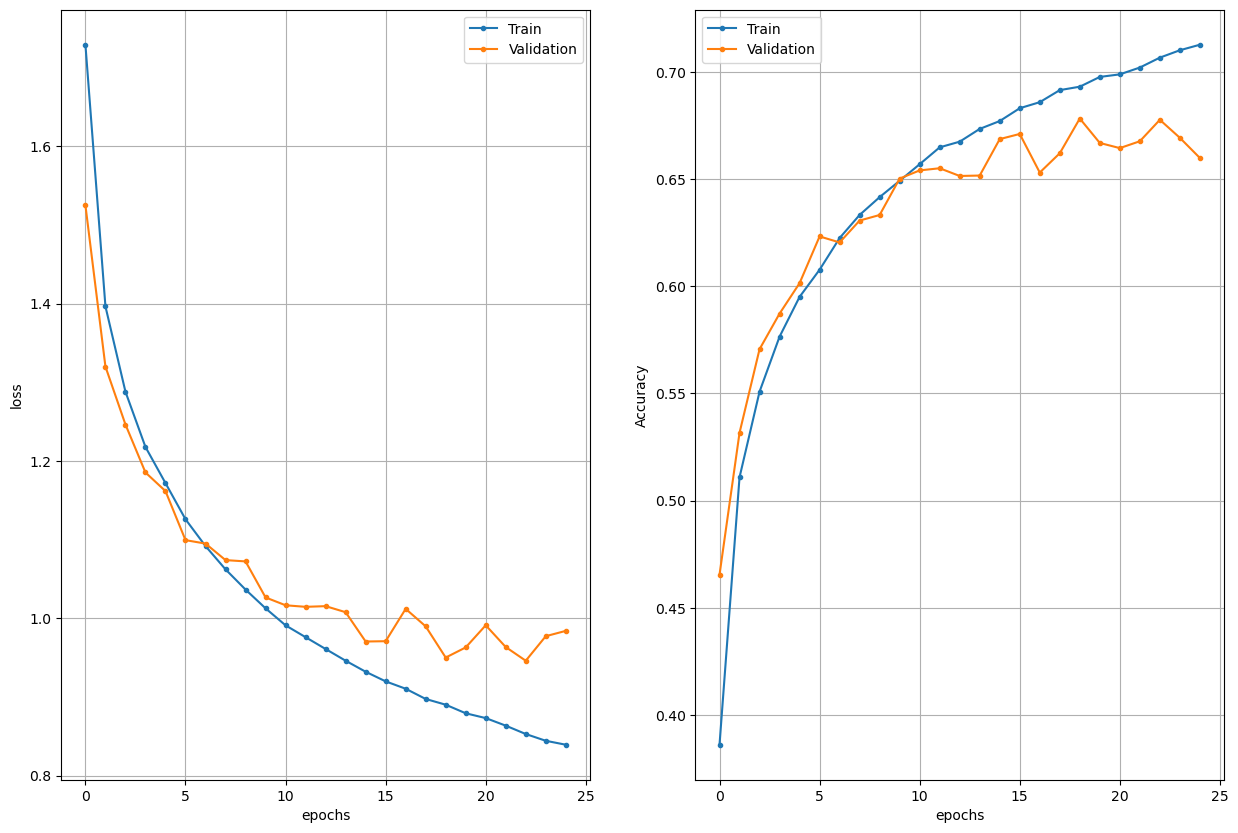

In [8]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

### Step 4: Evaluation

In this step, you have to calculate the accuracies and visualize some random samples. For the evaluation, you are going to use the test split from the dataset.

In [9]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

313/313 [==============================] - 0s 743us/step


In [10]:
y_pred_indices = np.argmax(y_pred, axis=1)

test_set_indices = np.random.randint(0, len(y_true), 20)

print('True', y_true[test_set_indices])
print('Pred', y_pred_indices[test_set_indices])

True [5 1 2 2 7 0 6 7 1 5 2 1 5 1 1 1 9 3 6 6]
Pred [2 1 2 2 7 0 6 7 1 2 3 1 0 1 1 1 3 4 6 5]


In [11]:
# method Compute and print the accuracy for each class
import numpy.ma as ma

for class_id, class_name in classes.items():
    total = np.count_nonzero(y_true==class_id)

    y_true_current = y_true!=class_id
    mx = ma.masked_array(y_pred_indices, mask=y_true_current)
    mx = mx[~mx.mask]
    correct = np.count_nonzero(mx==class_id)
    print(class_id, class_name, correct/total)

0 plane 0.763
1 car 0.781
2 bird 0.653
3 cat 0.459
4 deer 0.413
5 dog 0.596
6 frog 0.669
7 horse 0.75
8 ship 0.703
9 truck 0.768


In [12]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 0s 1ms/step - loss: 1.0079 - accuracy: 0.6555
Test loss   1.0078502893447876
Test metric 0.6554999947547913


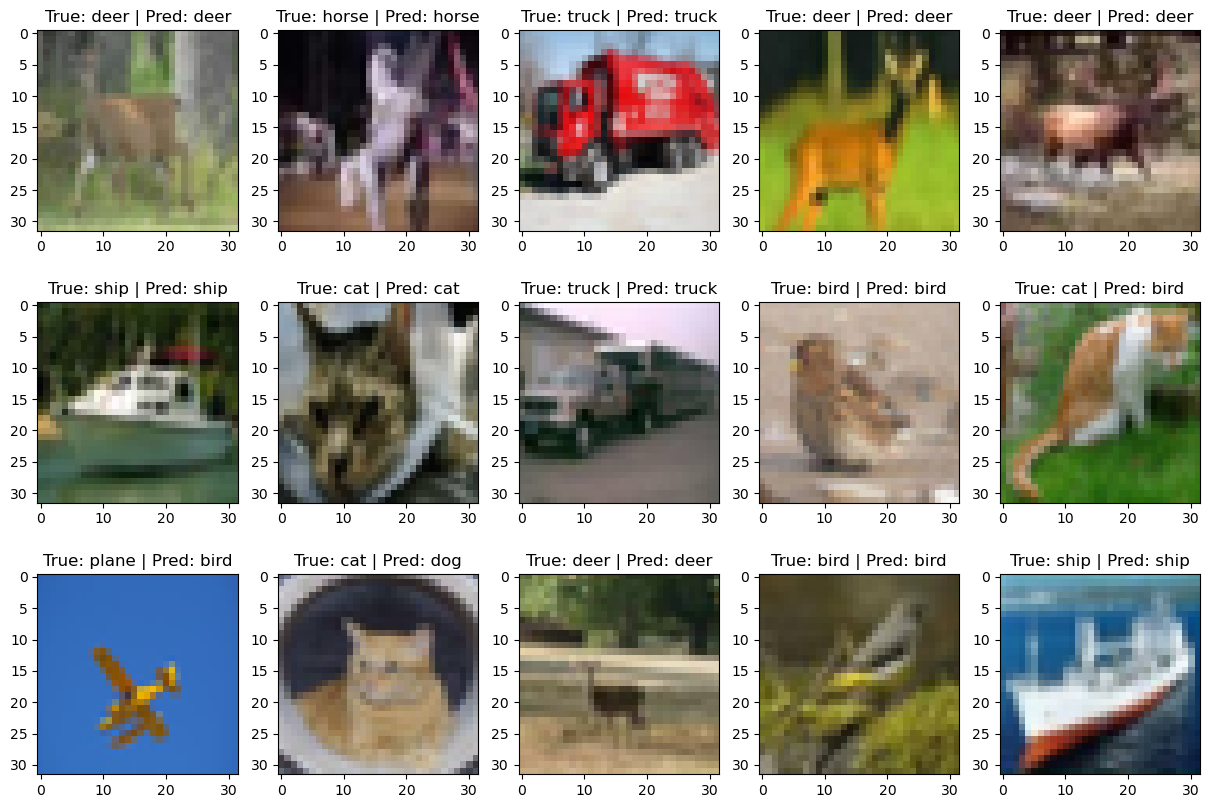

In [13]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, len(x_test))
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred_indices[idx]]))

##### Questions
* What is the overall accuracy of the classifier?
      -> accuracy: 0.65
  
* What modifications would you do in order to improve the classification accuracy?
  по логам видно что у котов и лосей наихудшие результаты при тесте, возможно и в этом причина
  
* Make **one** modification (that you think can help) and train the classifier again. Does the accuracy improve?
  попробуем увеличить кол-во кернелов в первом слое, также добавил еще один конволюшн слой. результат почему-то не сильно отличается-(
  количество эпох при тренировке немного улучшило результат до 0.71

In [14]:
#original
#net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
#net = MaxPooling2D(pool_size=(2, 2))(net)
#net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
#net = MaxPooling2D(pool_size=(2, 2))(net)
#net = Flatten()(net)
#outputs = Dense(num_classes, activation="softmax")(net)

inputs2 = Input(shape=(size, size, 3))

net = Conv2D(32, kernel_size=(3, 3), activation="relu")(inputs2)
net = MaxPooling2D(pool_size=(2, 2))(net)

net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)

net = Flatten()(net)
outputs2 = Dense(num_classes, activation="softmax")(net)

model2 = Model(inputs2, outputs2)

# Show the model
#model.summary()

In [15]:
epochs = 60
batch_size = 128

# Compile the model
model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model

start = time()
history = model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print('Elapsed time', time() - start)

Epoch 1/60
352/352 [==============================] - 1s 3ms/step - loss: 1.7192 - accuracy: 0.3784 - val_loss: 1.4583 - val_accuracy: 0.4762
Epoch 2/60
352/352 [==============================] - 1s 2ms/step - loss: 1.4065 - accuracy: 0.4976 - val_loss: 1.3394 - val_accuracy: 0.5174
Epoch 3/60
352/352 [==============================] - 1s 2ms/step - loss: 1.3109 - accuracy: 0.5357 - val_loss: 1.2445 - val_accuracy: 0.5614
Epoch 4/60
352/352 [==============================] - 1s 2ms/step - loss: 1.2313 - accuracy: 0.5670 - val_loss: 1.2109 - val_accuracy: 0.5728
Epoch 5/60
352/352 [==============================] - 1s 2ms/step - loss: 1.1787 - accuracy: 0.5876 - val_loss: 1.1384 - val_accuracy: 0.6120
Epoch 6/60
352/352 [==============================] - 1s 2ms/step - loss: 1.1328 - accuracy: 0.6037 - val_loss: 1.0917 - val_accuracy: 0.6204
Epoch 7/60
352/352 [==============================] - 1s 2ms/step - loss: 1.0891 - accuracy: 0.6212 - val_loss: 1.1618 - val_accuracy: 0.5930
Epoch 

Train Acc      0.8112444281578064
Validation Acc 0.72079998254776


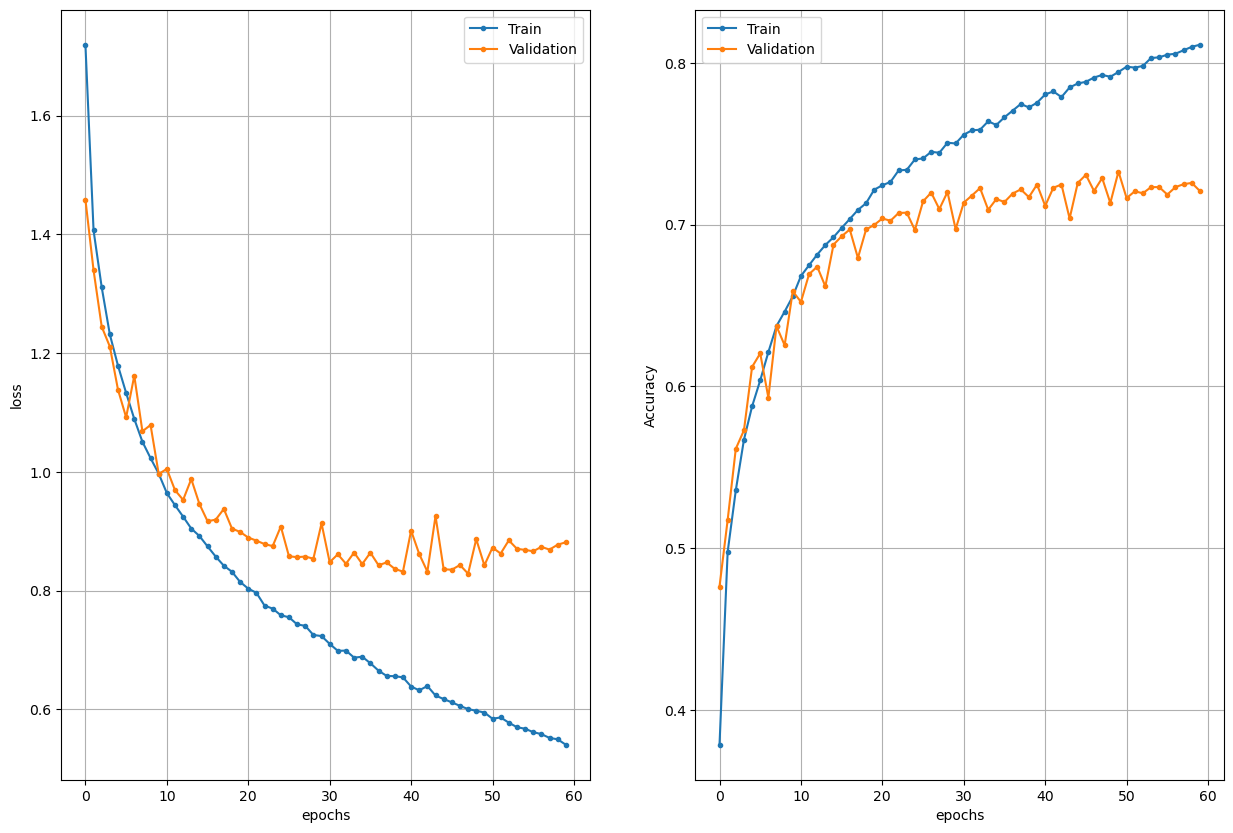

In [16]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

In [17]:
# Print the overall stats
ev = model2.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.9473 - accuracy: 0.7037
Test loss   0.9473252892494202
Test metric 0.7037000060081482


эту модель я украл с сайта с сайта https://www.kaggle.com/code/faizanurrahmann/cifar-10-object-classification-best-model
структура не сильно отличается от нашей, но видно что везде используется kernel_initializer='he_normal' и слой Dropout.
acc: 0.8 есть куда расти -)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

def create_model():
        """
        Build CNN model and Perform the following operations:

        1. Flatten the output of our base model to 1 dimension
        2. Add a fully connected layer with 1,024 hidden units and ReLU activation
        3. This time, we will go with a dropout rate of 0.2
        4. Add a final Fully Connected Sigmoid Layer
        """
        
        
        model = Sequential()
        model.add(Conv2D(32,  kernel_size = 3,kernel_initializer='he_normal', activation='relu', input_shape = (32, 32, 3)))
        model.add(BatchNormalization())
        
        model.add(Dropout(0.2))
        
        model.add(Conv2D(64, kernel_size = 3, kernel_initializer='he_normal', strides=1, activation='relu'))
        model.add(BatchNormalization())
        
        model.add(MaxPooling2D((2, 2)))
        model.add(Conv2D(128, kernel_size = 3, strides=1, kernel_initializer='he_normal' ,padding='same', activation='relu'))
        model.add(BatchNormalization())
        
        model.add(MaxPooling2D((2, 2)))
        model.add(Conv2D(64, kernel_size = 3,kernel_initializer='he_normal', activation='relu'))
        model.add(BatchNormalization())
        
        model.add(MaxPooling2D((4, 4)))
        model.add(Dropout(0.2))


        model.add(Flatten())
        model.add(Dense(256,kernel_initializer='he_normal', activation = "relu"))
        model.add(Dropout(0.1))
        model.add(Dense(10, kernel_initializer='glorot_uniform', activation = "softmax"))


        # Compile the model
        model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])

        return model
    
def train(model):
        """
        Train the model with parameters:
        epochs = 5
        steps_per_epoch=100
        validation_steps=50
        
        """
   
        epochs=50
       
            
        # We'll stop training if no improvement after some epochs
        earlystopper = EarlyStopping(monitor='acc', patience=5, verbose=1)
        reduce_lr = ReduceLROnPlateau(monitor='acc', factor=0.5, patience=5, 
                                   verbose=1, mode='max', min_lr=0.00001)
        # Save the best model during the traning
#         checkpointer = ModelCheckpoint('best_model1.h5'
#                                         ,monitor='val_acc'
#                                         ,verbose=1
#                                         ,save_best_only=True
#                                         ,save_weights_only=True)
        # Train
        training = model.fit(x=x_train,
                             y=y_train,
                             batch_size=32,
                             epochs=epochs,
                             verbose=1,
                             callbacks=[earlystopper, reduce_lr]
#                             validation_data=(X_val, Y_val),
                             
                            )
        return training

    
model3 = create_model()
#model3.summary()    

In [36]:
start = time()
training = train(model3)
print('Elapsed time', time() - start)

Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6640 - acc: 0.4052 - lr: 0.0010
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1870 - acc: 0.5763 - lr: 0.0010
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9877 - acc: 0.6496 - lr: 0.0010
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8511 - acc: 0.7007 - lr: 0.0010
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7665 - acc: 0.7323 - lr: 0.0010
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6973 - acc: 0.7566 - lr: 0.0010
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6436 - acc: 0.7744 - lr: 0.0010
Epoch 8/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6031 - acc: 0.7886 - lr: 0.0010
Epoch 9/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5623 - acc: 0.8039 - lr: 0.0010
Epoch 10/5

In [37]:
# Print the overall stats
ev = model3.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.7862 - acc: 0.8005
Test loss   0.7861786484718323
Test metric 0.8004999756813049
